<a href="https://colab.research.google.com/github/mariammur/CS4410/blob/main/Hw_7_(16_1)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext tensorboard


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [4]:
X_train.shape


(60000, 28, 28)

In [5]:
X_test.shape


(10000, 28, 28)

In [6]:
y_train.shape


(60000,)

In [7]:
y_test.shape


(10000,)

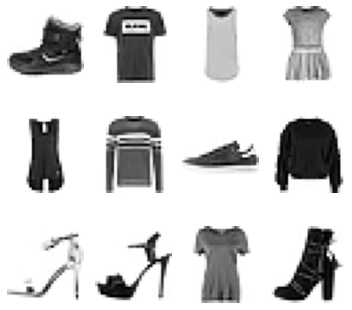

In [8]:
plt.figure(figsize=(5,5))
for k in range (12):
  plt.subplot(3,4,k+1)
  plt.imshow(X_train[k],cmap='Greys')
  plt.axis('off')
plt.tight_layout()
plt.show()

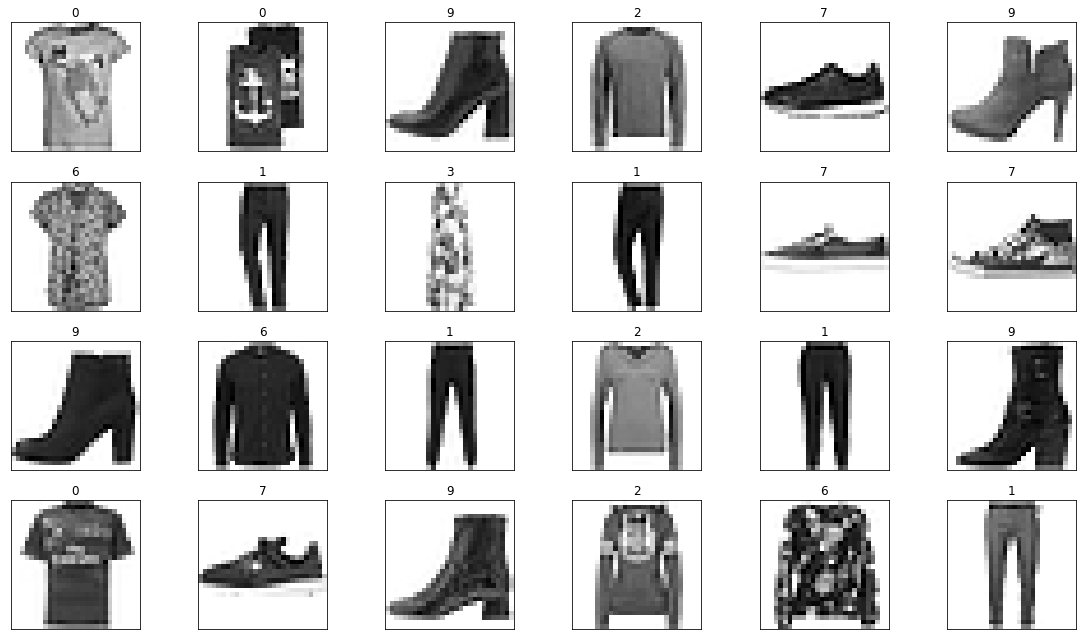

In [9]:
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  
    axes.set_yticks([])  
    axes.set_title(target)

plt.tight_layout()

In [10]:
X_train = X_train.reshape((60000, 28, 28, 1)) 
X_train.shape

(60000, 28, 28, 1)

In [11]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [12]:
X_train = X_train.astype('float32') / 255


In [13]:
X_test = X_test.astype('float32') / 255

In [14]:
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [15]:
cnn = Sequential() 

In [16]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))


In [17]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [18]:
cnn.compile(loss='categorical_crossentropy',metrics='accuracy')

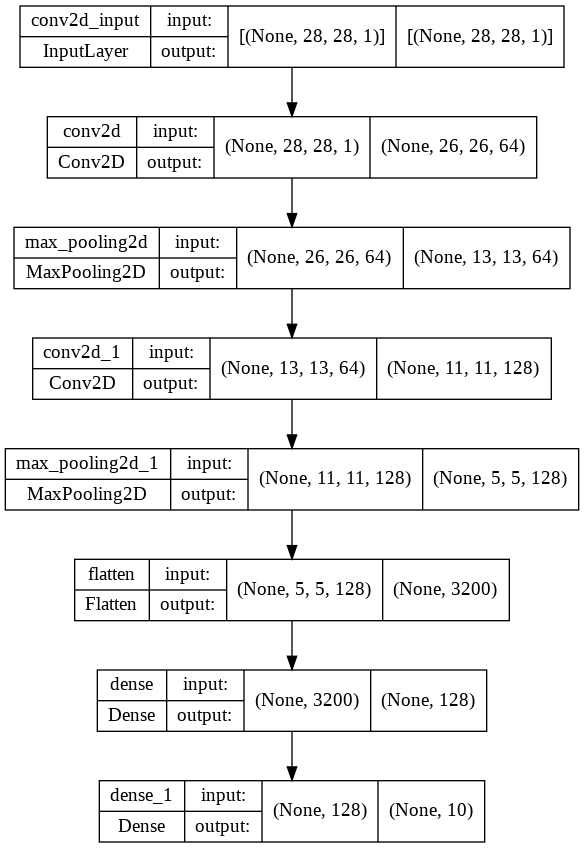

In [19]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png')

In [20]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [21]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 [==============================] - 118s 139ms/step - loss: 0.4540 - accuracy: 0.8367 - val_loss: 0.3343 - val_accuracy: 0.8807
Epoch 2/5
844/844 [==============================] - 114s 135ms/step - loss: 0.2982 - accuracy: 0.8904 - val_loss: 0.2757 - val_accuracy: 0.8992
Epoch 3/5
844/844 [==============================] - 118s 140ms/step - loss: 0.2522 - accuracy: 0.9073 - val_loss: 0.2854 - val_accuracy: 0.8922
Epoch 4/5
844/844 [==============================] - 115s 137ms/step - loss: 0.2179 - accuracy: 0.9201 - val_loss: 0.2556 - val_accuracy: 0.9075
Epoch 5/5
844/844 [==============================] - 116s 137ms/step - loss: 0.1913 - accuracy: 0.9302 - val_loss: 0.2341 - val_accuracy: 0.9165


In [22]:
predictions = cnn.predict(X_test)


In [23]:
y_test[0]


9

In [24]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')


0: 0.0000041762%
1: 0.0000061654%
2: 0.0000000587%
3: 0.0000000435%
4: 0.0000001770%
5: 0.1310816850%
6: 0.0000001432%
7: 0.0280472072%
8: 0.0000187239%
9: 99.8408377171%


In [25]:
images = X_test.reshape((10000, 28, 28))


In [26]:
incorrect_predictions = []


In [27]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [28]:
len(incorrect_predictions) 


8890

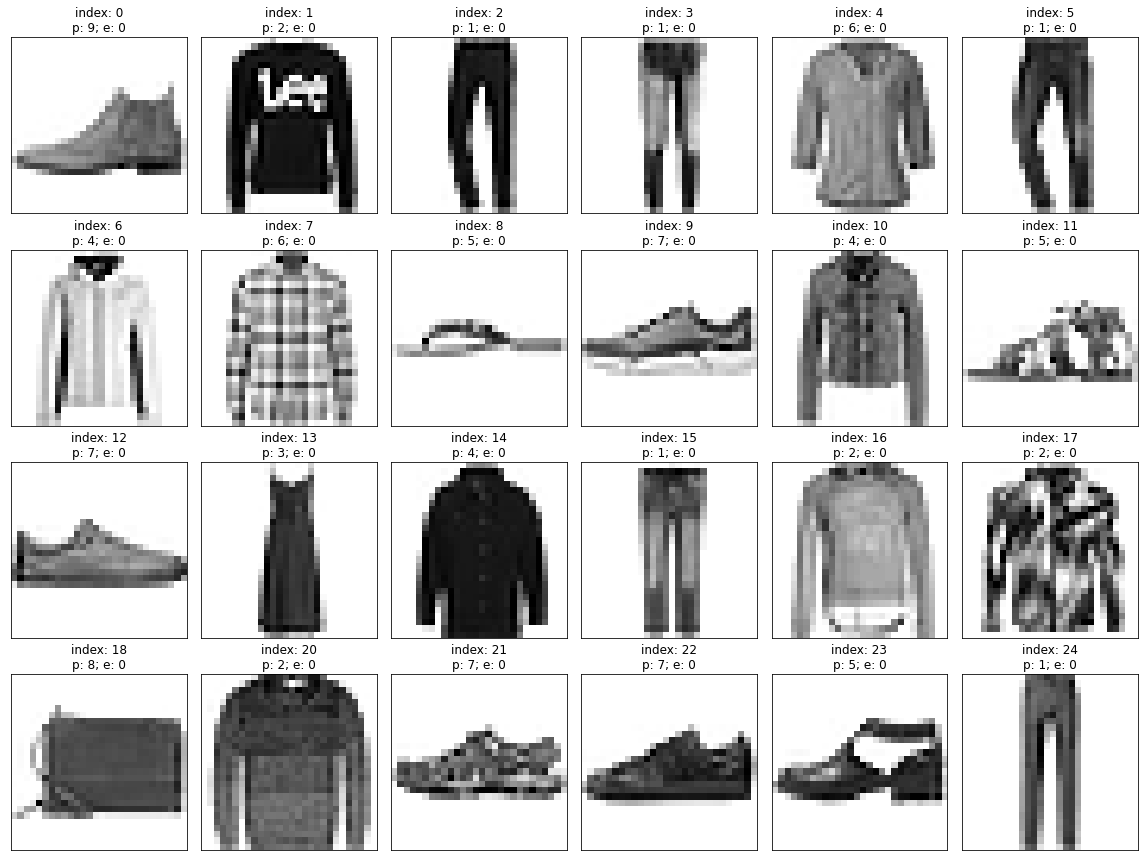

In [29]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [30]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [31]:
display_probabilities(predictions[340])


0: 0.0174223125%
1: 0.0203694464%
2: 11.5775071084%
3: 0.0215283580%
4: 84.8624646664%
5: 0.0005096858%
6: 3.4630205482%
7: 0.0006169910%
8: 0.0320814434%
9: 0.0044827913%


In [32]:
display_probabilities(predictions[740])


0: 0.0202346899%
1: 0.0162119599%
2: 0.0016446709%
3: 99.5476901531%
4: 0.0333872042%
5: 0.0005087548%
6: 0.3772119526%
7: 0.0000309027%
8: 0.0020006932%
9: 0.0010784483%


In [33]:
display_probabilities(predictions[1260])


0: 99.9707639217%
1: 0.0000014840%
2: 0.0002882175%
3: 0.0001503564%
4: 0.0000006586%
5: 0.0000000015%
6: 0.0287896139%
7: 0.0000000000%
8: 0.0000001610%
9: 0.0000000003%


In [36]:
cnn.save('fashion_mnist_cnn.h5')


In [37]:
from tensorflow.keras.models import load_model
cnn = load_model('fashion_mnist_cnn.h5')